# Import data from MySQL and perform EDA on Student Marks

# Import Libraries and Load data from MySQL

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn as sk
from scipy import stats
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

ERROR 1290 (HY000): The MySQL server is running with the --secure-file-priv option so it cannot execute this statement

I get the above error when I try to load the data into mysql.

In [11]:
ds=pd.read_csv('student_marks.csv')

# Take a look at the dataset

In [12]:
ds.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,5/4/1988,55,45,56,87,21,52,89,65
1,Suresh,M,4/5/1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12/8/1990,78,96,86,63,54,89,75,45
4,Jennifer,F,2/9/1989,58,96,78,46,96,77,83,53


In [13]:
ds.shape

(10, 11)

In [14]:
ds.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


# Summary statistics and correlation

In [16]:
# Show basic stssts for ds
ds.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


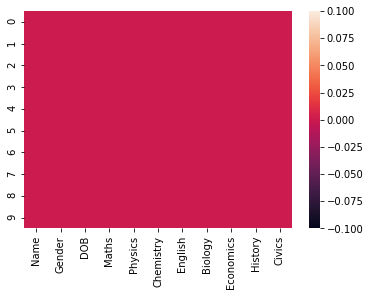

In [17]:
# Show null values heatmap
sns.heatmap(ds.isnull())

No null values present

In [18]:
# Check correlation
dscor=ds.corr()
dscor

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


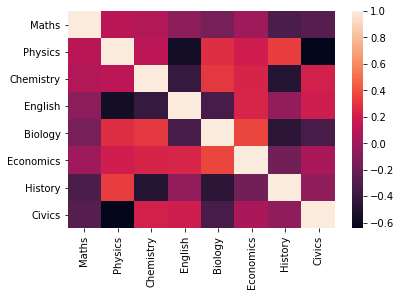

In [19]:
# Show correlation heatmap
sns.heatmap(dscor)

# Data Visualization


In [20]:
# Show mean values for the grades obtained per subject
ds.mean()

Maths        59.6
Physics      72.3
Chemistry    75.3
English      69.7
Biology      64.7
Economics    72.7
History      69.7
Civics       60.5
dtype: float64

In [21]:
ds.columns


Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

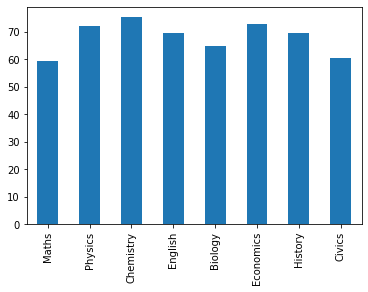

In [22]:
ds.mean().plot(kind = 'bar')

The students got the best grades in Chemistry and the worst grades in Maths overall.

In [23]:
ds.groupby('Gender')['Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'].mean()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Gender,,,,,,,,
F,58.2,81.2,73.2,66.2,71.6,77.6,74.4,60.0
M,61.0,63.4,77.4,73.2,57.8,67.8,65.0,61.0


From the data it can be seen that the females in the group perform better in Physics, Biology, Economics and History.
The males on the other hand perform better in Maths, Chemistry, English and Civics.

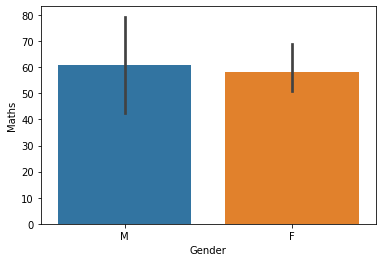

In [24]:
# Show the mean scores for Maths by gender.
sns.barplot(x='Gender',y='Maths', data=ds)

Maths is the worst performing subject overall, with the males performing slightly better but their performance is very similar to that of the females'.

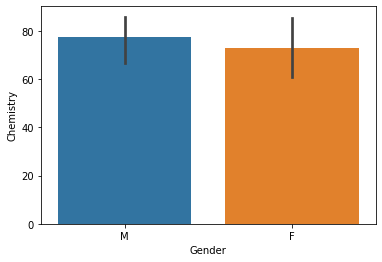

In [25]:
sns.barplot(x='Gender',y='Chemistry', data=ds)

Chemistry is the best performing subject overall, with the males performing better but their performances are fairly close to the females'.

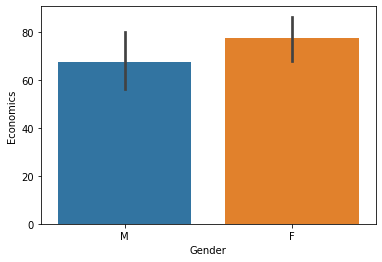

In [26]:
sns.barplot(x='Gender',y='Economics', data=ds)

Economics has the greatest disparity in the performance between the sexes, with the females performing significantly better.

In [27]:
# Change the index column to the name column
ds.set_index('Name', inplace=True)

In [28]:
# Show student with the best
ds['Maths'].idxmax()

'Mukesh'

In [29]:
# Show student with the best
ds['Maths'].max()

96

In [30]:
# Create arrays with the results for the best students per subject and their scores.

cols=['Maths', 'Physics', 'Chemistry', 'English','Biology', 'Economics', 'History', 'Civics']
st_list=[]
max_score=[]

name=ds['Maths'].idxmax()
st_list.append(name)
maxs=ds['Maths'].max()
max_score.append(maxs)

name=ds['Physics'].idxmax()
st_list.append(name)
maxs=ds['Physics'].max()
max_score.append(maxs)

name=ds['Chemistry'].idxmax()
st_list.append(name)
maxs=ds['Chemistry'].max()
max_score.append(maxs)

name=ds['English'].idxmax()
st_list.append(name)
maxs=ds['English'].max()
max_score.append(maxs)

name=ds['Biology'].idxmax()
st_list.append(name)
maxs=ds['Biology'].max()
max_score.append(maxs)

name=ds['Economics'].idxmax()
st_list.append(name)
maxs=ds['Economics'].max()
max_score.append(maxs)

name=ds['History'].idxmax()
st_list.append(name)
maxs=ds['History'].max()
max_score.append(maxs)

name=ds['Civics'].idxmax()
st_list.append(name)
maxs=ds['Civics'].max()
max_score.append(maxs)

In [31]:
# Create table to display the best student per sybject and their score
result=pd.DataFrame({'Subject':cols,'Best student': st_list, 'Best score': max_score, })
result

,Subject,Best student,Best score
0,Maths,Mukesh,96
1,Physics,Suresh,96
2,Chemistry,Ramesh,89
3,English,Annu,89
4,Biology,Jennifer,96
5,Economics,Jessica,89
6,History,John,89
7,Civics,Farha,89


This table only displays the first student on the list with the highest score per subject.  however, there could be multiple students who all have the same top score. This table is therefore incomplete.

In [32]:
# Add a column to the dataset that totals the scores of all the subjects per student
total_marks = ds['Maths']+ ds['Physics']+ds['Chemistry']+ds['English']+ds['Biology']+ds['Economics']+ds['History']+ds['Civics']
ds['Total Marks'] = total_marks

In [33]:
ds.head()

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total Marks
Name,,,,,,,,,,,
John,M,5/4/1988,55,45,56,87,21,52,89,65,470
Suresh,M,4/5/1987,75,96,78,64,90,61,58,2,524
Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74,556
Jessica,F,12/8/1990,78,96,86,63,54,89,75,45,586
Jennifer,F,2/9/1989,58,96,78,46,96,77,83,53,587


In [34]:
# Best scoring student overall
ds['Total Marks'].idxmax()

'Jennifer'

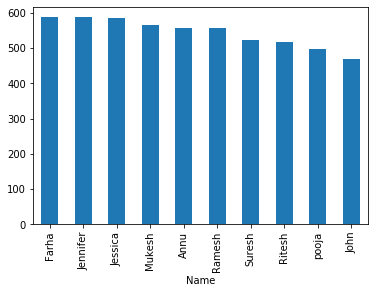

In [35]:
# Show total marks of all students descending
ds['Total Marks'].sort_values(ascending=False).head(20).plot.bar()

From the graph we can tell that 2 students (Farha and Jennifer) have the same overall top-score, meaning the idmax function used above does not tell the full story.

We can also see that the worst performing student overall is John.


# Encode categorical data to numerical data with LabelEncoder

In [36]:
# Change categorical data to numerical data for all categoriacl columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [37]:
ds['Gender'] = le.fit_transform(ds['Gender'])

In [38]:
ds.head()

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total Marks
Name,,,,,,,,,,,
John,1,5/4/1988,55,45,56,87,21,52,89,65,470
Suresh,1,4/5/1987,75,96,78,64,90,61,58,2,524
Ramesh,1,25-05-1989,25,54,89,76,95,87,56,74,556
Jessica,0,12/8/1990,78,96,86,63,54,89,75,45,586
Jennifer,0,2/9/1989,58,96,78,46,96,77,83,53,587


# Drop columns to check outliers and perform zscore and skewness adjustments.

In [39]:
# Drop the index column (the Name column in this case)
ds.reset_index(drop=True, inplace=True)

In [40]:
# Drop non-numeric columns
nds=ds.drop(columns=['DOB'])

In [41]:
nds.head()

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total Marks
0,1,55,45,56,87,21,52,89,65,470
1,1,75,96,78,64,90,61,58,2,524
2,1,25,54,89,76,95,87,56,74,556
3,0,78,96,86,63,54,89,75,45,586
4,0,58,96,78,46,96,77,83,53,587


# Check and remove outliers with zscore 

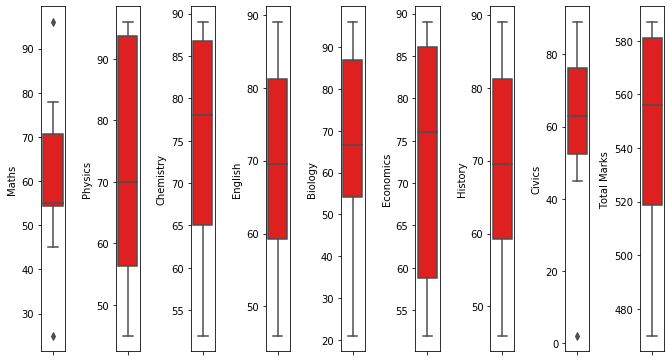

In [42]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=10
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [43]:
from scipy.stats import zscore
z_score=abs(zscore(nds))
print(nds.shape)
dsf=nds.loc[(z_score<3).all(axis=1)]
print(dsf.shape)

(10, 10)
(10, 10)


No outliers removed. All data within zscore bounds.

# Check and adjust skewness

In [44]:
dsf.skew()

Gender         0.000000
Maths          0.246964
Physics       -0.045336
Chemistry     -0.746462
English       -0.131222
Biology       -0.496446
Economics     -0.245555
History       -0.131222
Civics        -1.332448
Total Marks   -0.642123
dtype: float64

In [45]:
#Treating using log
for col in dsf.columns:
    if dsf.skew().loc[col]>0.55:
        dsf[col]=np.log1p(dsf[col])

In [46]:
dsf.skew()

Gender         0.000000
Maths          0.246964
Physics       -0.045336
Chemistry     -0.746462
English       -0.131222
Biology       -0.496446
Economics     -0.245555
History       -0.131222
Civics        -1.332448
Total Marks   -0.642123
dtype: float64

Skewness is still the same.

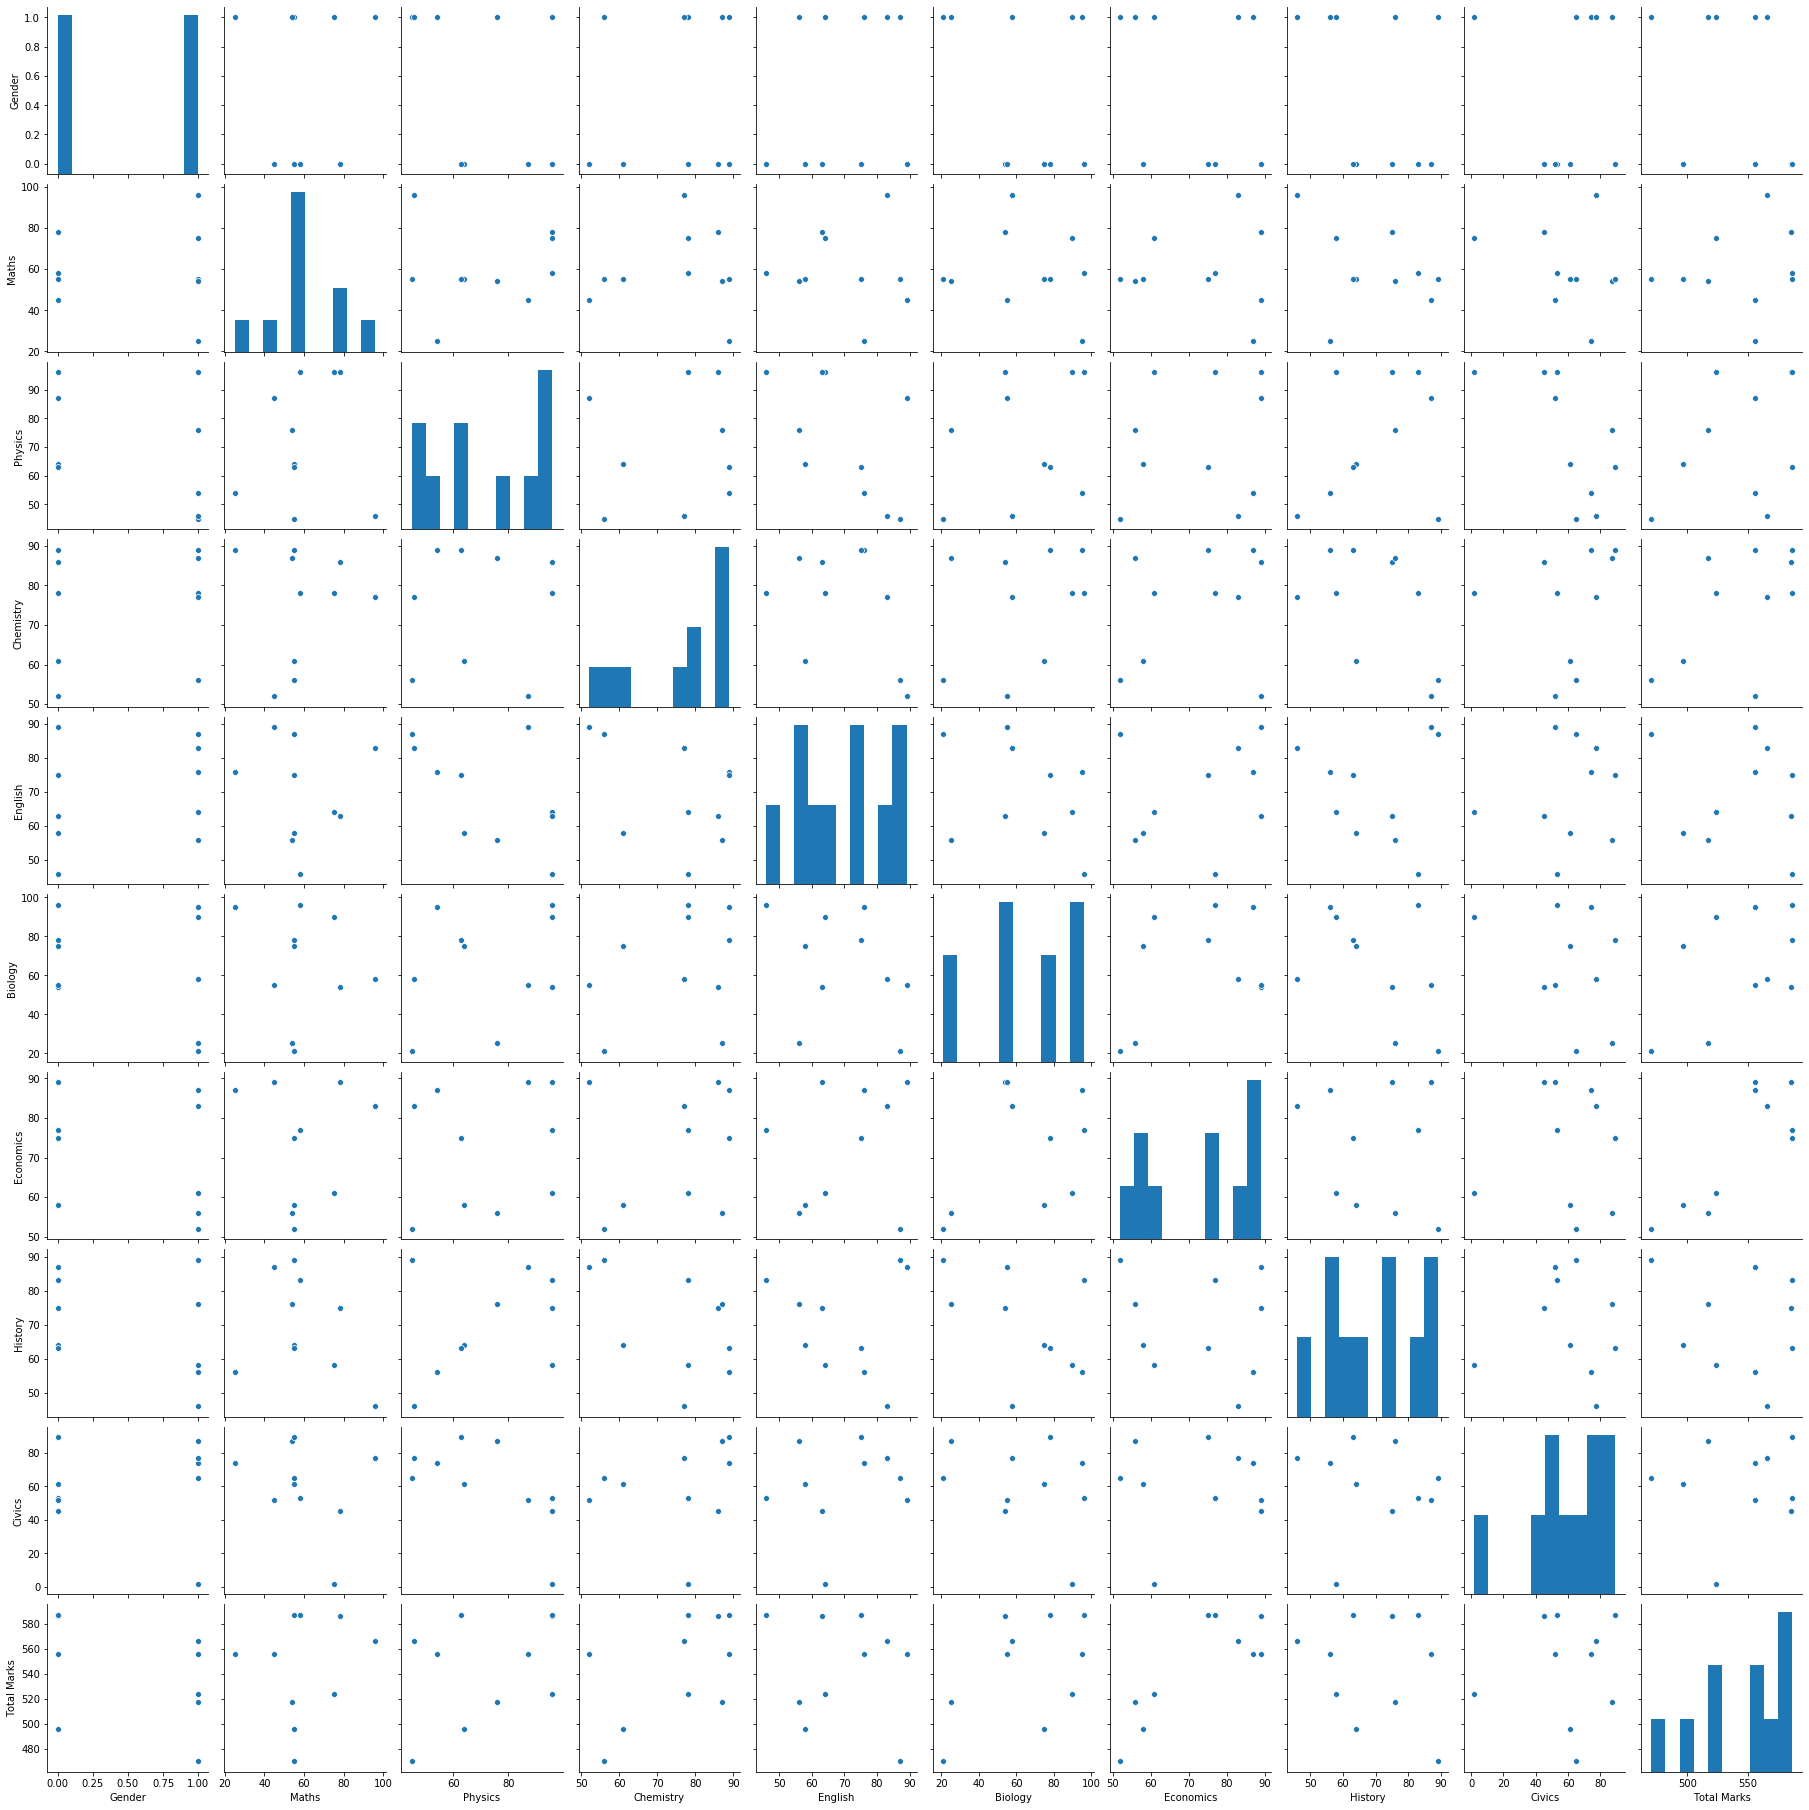

In [47]:
# Checking pairplots
sns.pairplot(dsf)
plt.show()

Pairplots show no strong relationships between data.